In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import pandas as pd
import numpy as np
import warnings
import sys

In [2]:
# suppressing warning messages
warnings.filterwarnings('ignore')

In [3]:
# importing scripts
sys.path.insert(1, '../scripts')

from data_viz import Data_Viz
from data_cleaning import DataCleaner
from data_transformation import DataTransformer

DV = Data_Viz("../logs/data_clean_notebook.log")
DC = DataCleaner("../logs/data_clean_notebook.log")
DT = DataTransformer("../logs/data_clean_notebook.log")


In [4]:
# importing datasets

sample = pd.read_csv("../data/sample_submission.csv")
store = pd.read_csv("../data/store.csv")
test = pd.read_csv("../data/test.csv")
train = pd.read_csv("../data/train.csv")

In [5]:
# checking sample dataset
print(sample.shape)
DV.summ_columns(sample)

(41088, 2)


,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Id,0,0.0,int64,41088
1,Sales,0,0.0,int64,1


In [6]:
print(store.shape)
DV.summ_columns(store)

(1115, 10)


,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Store,0,0.0,int64,1115
1,StoreType,0,0.0,object,4
2,Assortment,0,0.0,object,3
3,CompetitionDistance,3,0.0,float64,655
4,CompetitionOpenSinceMonth,354,32.0,float64,13
5,CompetitionOpenSinceYear,354,32.0,float64,24
6,Promo2,0,0.0,int64,2
7,Promo2SinceWeek,544,49.0,float64,25
8,Promo2SinceYear,544,49.0,float64,8
9,PromoInterval,544,49.0,object,4


In [7]:
# checking if the promo dates are 0 becuase promo2 is 0

promo2_1_df = store.loc[store['Promo2'] == 1]
DV.summ_columns(promo2_1_df)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Store,0,0.0,int64,571
1,StoreType,0,0.0,object,4
2,Assortment,0,0.0,object,3
3,CompetitionDistance,1,0.0,float64,397
4,CompetitionOpenSinceMonth,206,36.0,float64,13
5,CompetitionOpenSinceYear,206,36.0,float64,24
6,Promo2,0,0.0,int64,1
7,Promo2SinceWeek,0,0.0,float64,24
8,Promo2SinceYear,0,0.0,float64,7
9,PromoInterval,0,0.0,object,3


In [8]:
store['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [9]:
# replacing empty values with 0 and NA
store_clean = store.copy(deep=True)
store_clean['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0)
store_clean['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(0)
store_clean['PromoInterval'] = store['PromoInterval'].fillna('Not_Av')

In [10]:
# removing columns with more than 30% missing value

store_clean = DC.reduce_dim_missing(store_clean, 30)

In [11]:
# checking cleaned data 

DV.summ_columns(store_clean)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Store,0,0.0,int64,1115
1,StoreType,0,0.0,object,4
2,Assortment,0,0.0,object,3
3,CompetitionDistance,3,0.0,float64,655
4,Promo2,0,0.0,int64,2
5,Promo2SinceWeek,0,0.0,float64,25
6,Promo2SinceYear,0,0.0,float64,8
7,PromoInterval,0,0.0,object,4


In [12]:
# merging datasets
train_store = pd.merge(train, store_clean, how = 'left', on = "Store")
test_store = pd.merge(test, store_clean, how='left', on = 'Store')

In [13]:
# checking store dataset
print(train_store.shape)
DV.summ_columns(train_store)

(1017209, 16)


,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Store,0,0.0,int64,1115
1,DayOfWeek,0,0.0,int64,7
2,Date,0,0.0,object,942
3,Sales,0,0.0,int64,21734
4,Customers,0,0.0,int64,4086
5,Open,0,0.0,int64,2
6,Promo,0,0.0,int64,2
7,StateHoliday,0,0.0,object,5
8,SchoolHoliday,0,0.0,int64,2
9,StoreType,0,0.0,object,4


In [14]:
print(test_store.shape)
DV.summ_columns(test_store)

(41088, 15)


,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Id,0,0.0,int64,41088
1,Store,0,0.0,int64,856
2,DayOfWeek,0,0.0,int64,7
3,Date,0,0.0,object,48
4,Open,11,0.0,float64,3
5,Promo,0,0.0,int64,2
6,StateHoliday,0,0.0,object,2
7,SchoolHoliday,0,0.0,int64,2
8,StoreType,0,0.0,object,4
9,Assortment,0,0.0,object,3


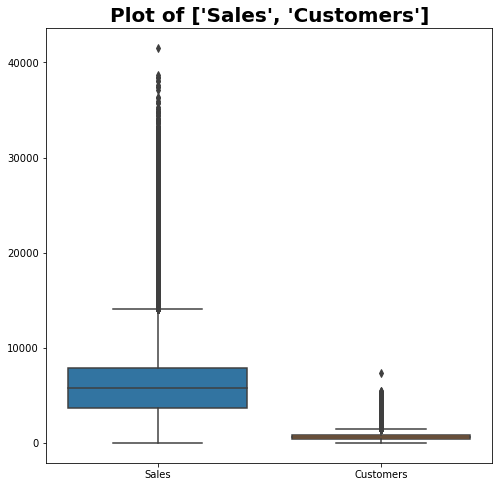

In [15]:
# checking for outliers

DV.plot_box2(train_store, ['Sales', 'Customers'])

**Observation**
- sales and customers have outliers

In [16]:
# a pipeline to handle missing values and outliers.
pipe = Pipeline(steps=[ ("Handle numerical missing values", FunctionTransformer(DC.fill_missing_by_median)),
                        ("Handle categorical missing values", FunctionTransformer(DC.fill_missing_by_mode)),
                        ("Handle outlier", FunctionTransformer(DC.fill_outliers_mean, kw_args={'cols':['Sales', 'Customers']}))])

In [17]:
# running the train dataset in the cleaning pipe

train_store_clean = pipe.fit_transform(train_store)

DV.summ_columns(train_store_clean)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Store,0,0.0,int64,1115
1,DayOfWeek,0,0.0,int64,7
2,Date,0,0.0,object,942
3,Sales,0,0.0,float64,13194
4,Customers,0,0.0,float64,1423
5,Open,0,0.0,int64,2
6,Promo,0,0.0,int64,2
7,StateHoliday,0,0.0,object,5
8,SchoolHoliday,0,0.0,int64,2
9,StoreType,0,0.0,object,4


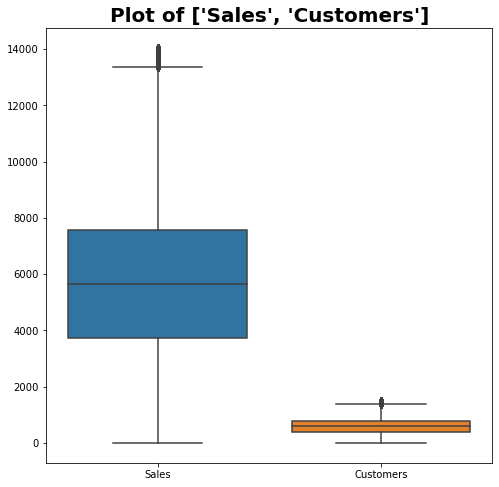

In [18]:
# checking if outliers are handled

DV.plot_box2(train_store_clean, ['Sales', 'Customers'])

### checking variables individually

In [19]:
# checking stateholiday variable

train_store_clean['StateHoliday'].value_counts().index

Index(['0', 0, 'a', 'b', 'c'], dtype='object')

**Observation**
there is a repeating value: 0 one is string and one is numeric.

In [20]:
train_store_clean["StateHoliday"] = train_store_clean["StateHoliday"].values.astype(str)
value_list = train_store_clean['StateHoliday'].value_counts().index.to_list()
value_list

['0', 'a', 'b', 'c']

In [21]:
# replacing values with readable name

replace_list = ['No Holiday', 'Public Holiday', 'Easter','Chrismas']
train_store_clean = DC.rename(train_store_clean, 'StateHoliday', value_list, replace_list)
train_store_clean['StateHoliday'].value_counts().index.to_list()

['No Holiday', 'Public Holiday', 'Easter', 'Chrismas']

In [22]:
# Separating the date column
DC.convert_to_datetime(train_store_clean, ['Date'])

# creating new features
train_store_clean['Year'] = train_store_clean['Date'].apply(lambda x: x.year)
train_store_clean['Month'] = train_store_clean['Date'].apply(lambda x: x.month)
train_store_clean['DayOfMonth'] = train_store_clean['Date'].apply(lambda x: x.day)
train_store_clean['WeekOfYear'] = train_store_clean['Date'].apply(lambda x: x.weekofyear)
train_store_clean['weekday'] = train_store_clean['DayOfWeek'].apply(lambda x: 0 if (x in [6, 7]) else 1)
train_store_clean['MonthPeriod'] = train_store_clean['DayOfMonth'].apply(lambda x: 0 if (x < 8) else (2 if(x > 21) else 1))
train_store_clean['Holiday'] = train_store_clean['StateHoliday'].apply(lambda x: 0 if (x == 'No Holiday') else 1)
train_store_clean['YearlyTerm'] = train_store_clean['Month'].apply(lambda x: 0 if(x<4) else(1 if(x>3 and x<7) 
                                                                    else(2 if(x>6 and x<10) else 3)))

In [23]:
DV.summ_columns(train_store_clean)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Store,0,0.0,int64,1115
1,DayOfWeek,0,0.0,int64,7
2,Date,0,0.0,datetime64[ns],942
3,Sales,0,0.0,float64,13194
4,Customers,0,0.0,float64,1423
5,Open,0,0.0,int64,2
6,Promo,0,0.0,int64,2
7,StateHoliday,0,0.0,object,4
8,SchoolHoliday,0,0.0,int64,2
9,StoreType,0,0.0,object,4


In [24]:
# saving cleaned dataframes

train_store_clean.to_csv("../data/train_store.csv", index = False)
test_store.to_csv("../data/test_store.csv", index = False)